In [1]:
pip install transformers torch accelerate

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install datasets

In [5]:
pip install datasets transformers ipywidgets

Note: you may need to restart the kernel to use updated packages.


# Step 1: Load and Visualize the Datasets

In [1]:
import pandas as pd

# Load the datasets
statement_status_df = pd.read_csv("C:\\Users\\MihirMtech2426\\Desktop\\NLPProject\\dataSet\\main_statement_status_new_file.csv")
context_response_df = pd.read_csv("C:\\Users\\MihirMtech2426\\Desktop\\NLPProject\\dataSet\\context_response.csv")

# Display basic info and samples
print("Dataset 1: Statement and Status")
print(statement_status_df.info())
print(statement_status_df.head())

print("\nDataset 2: Context and Response")
print(context_response_df.info())
print(context_response_df.head())


Dataset 1: Statement and Status
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55881 entries, 0 to 55880
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  55519 non-null  object
 1   status     55881 non-null  object
dtypes: object(2)
memory usage: 873.3+ KB
None
                                           statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

Dataset 2: Context and Response
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3508 non-null   o

# Step 2: Visualize Dataset 1 (statement_status_df)
## This dataset appears to map user statements to corresponding statuses (e.g., stress, depression, etc.). Key actions:

### -Count the number of samples for each status.
### -Visualize the distribution of statuses.
### -Check for missing values and sample text length.

Handling missing and infinite values...

Missing values after cleaning:
statement    0
status       0
dtype: int64


C:\Users\MihirMtech2426\AppData\Local\Temp\ipykernel_28612\2474257528.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


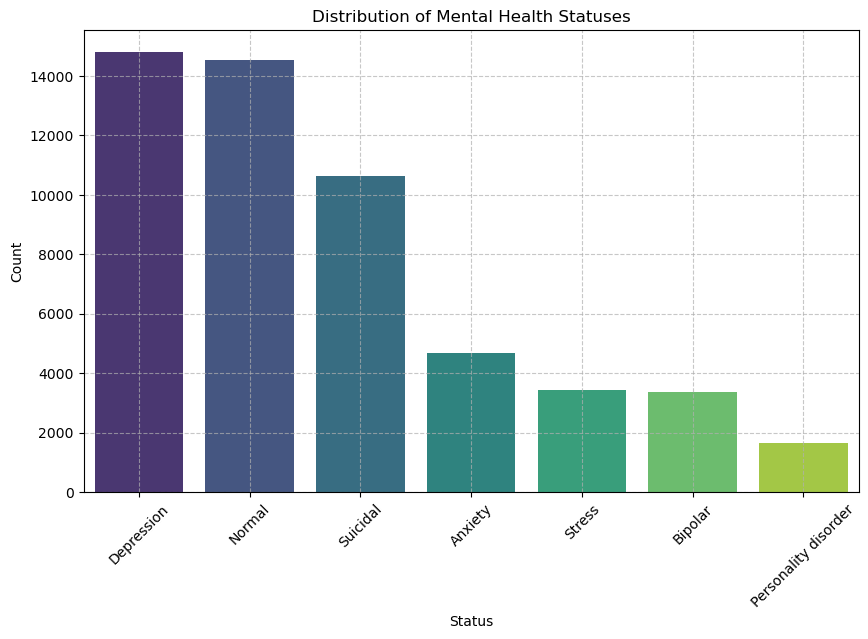

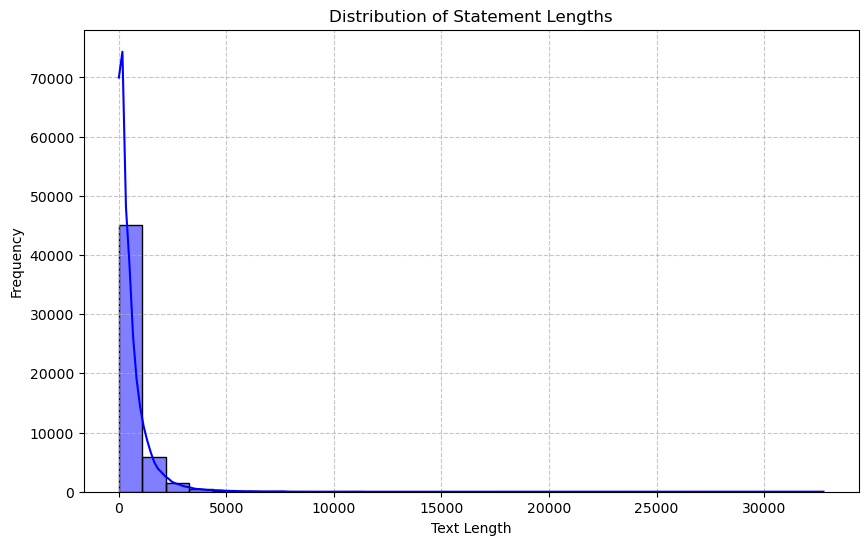


Sample of the cleaned dataset:
                                           statement   status  text_length
0                                         oh my gosh  Anxiety           10
1  trouble sleeping, confused mind, restless hear...  Anxiety           64
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety           78
3  I've shifted my focus to something else but I'...  Anxiety           61
4  I'm restless and restless, it's been a month n...  Anxiety           72


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have loaded the dataset
statement_status_df = pd.read_csv("C:\\Users\\MihirMtech2426\\Desktop\\NLPProject\\dataSet\\main_statement_status_new_file.csv")  

# Handle missing and infinite values
print("Handling missing and infinite values...")

# Replace inf/-inf with NaN and fill missing values in 'statement' column
statement_status_df.replace([np.inf, -np.inf], np.nan, inplace=True)
statement_status_df["statement"] = statement_status_df["statement"].fillna("").astype(str)

# Check for missing values
print("\nMissing values after cleaning:")
print(statement_status_df.isnull().sum())

# Visualize distribution of statuses
status_counts = statement_status_df["status"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid
plt.show()

# Add a new column for statement text length
statement_status_df["text_length"] = statement_status_df["statement"].apply(len)

# Visualize the distribution of statement lengths
plt.figure(figsize=(10, 6))
sns.histplot(statement_status_df["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Statement Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid
plt.show()

# Display a sample of the cleaned dataset
print("\nSample of the cleaned dataset:")
print(statement_status_df.head())


# Step 3: Visualize Dataset 2 (context_response_df)
## This dataset maps a context (input) to a response (output). Key actions:

### -Count the length of context and response.
### -Check for duplicate context-response pairs.
### -Check for missing values.

Missing values in Dataset 2:
Context     0
Response    4
dtype: int64

Missing values after handling:
Context     0
Response    0
dtype: int64


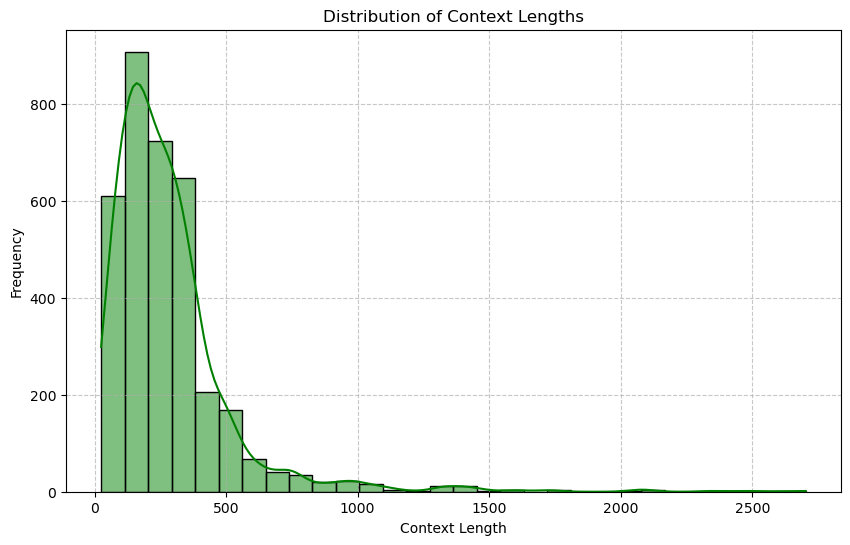

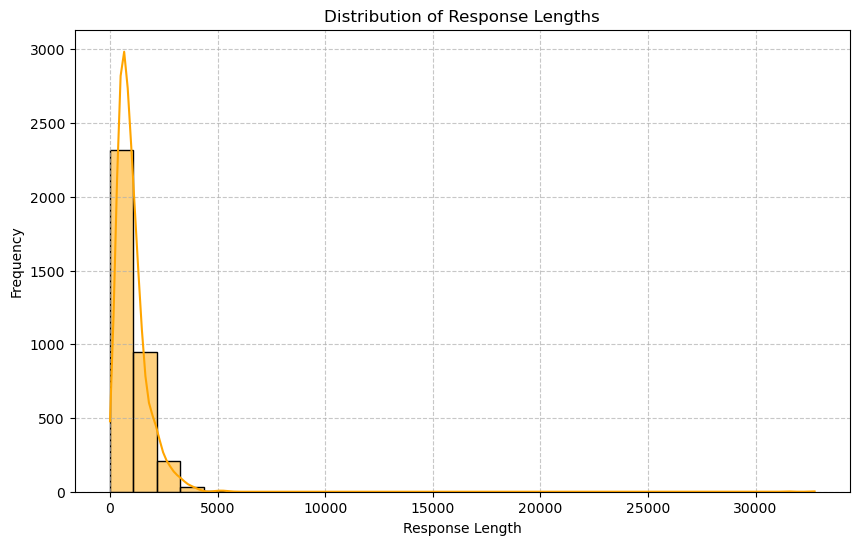

Number of duplicate context-response pairs: 760


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
context_response_df = pd.read_csv("C:\\Users\\MihirMtech2426\\Desktop\\NLPProject\\dataSet\\context_response.csv")  

# Check for missing values
print("Missing values in Dataset 2:")
print(context_response_df.isnull().sum())

# Handle missing values in 'Response' column by filling NaN with an empty string or drop rows
context_response_df['Response'] = context_response_df['Response'].fillna('')  # Option 1: Fill missing responses with an empty string
# Alternatively, you can remove rows with missing values in both columns:
# context_response_df.dropna(subset=['Context', 'Response'], inplace=True)

# Verify that there are no more missing values
print("\nMissing values after handling:")
print(context_response_df.isnull().sum())

# Visualize context length distribution
context_response_df["context_length"] = context_response_df["Context"].apply(lambda x: len(str(x)))  # Convert to string if needed
plt.figure(figsize=(10, 6))
sns.histplot(context_response_df["context_length"], bins=30, kde=True, color="green")
plt.title("Distribution of Context Lengths")
plt.xlabel("Context Length")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid
plt.show()

# Visualize response length distribution
context_response_df["response_length"] = context_response_df["Response"].apply(lambda x: len(str(x)))  # Convert to string if needed
plt.figure(figsize=(10, 6))
sns.histplot(context_response_df["response_length"], bins=30, kde=True, color="orange")
plt.title("Distribution of Response Lengths")
plt.xlabel("Response Length")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid
plt.show()

# Check for duplicate context-response pairs
duplicate_pairs = context_response_df.duplicated().sum()
print(f"Number of duplicate context-response pairs: {duplicate_pairs}")


# Step 4: Prepare Dataset for Training
## For Classification (Dataset 1):
### "Preprocess the statement_status_df for text classification.

In [7]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
train_df, test_df = train_test_split(statement_status_df, test_size=0.2, random_state=42)

# Tokenize text for transformer-based models
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the data
def tokenize_data(df):
    return tokenizer(list(df["statement"]), truncation=True, padding=True, max_length=128)

train_encodings = tokenize_data(train_df)
test_encodings = tokenize_data(test_df)

# Encode labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df["status"])
test_labels = label_encoder.transform(test_df["status"])

# Save label encoder
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


## For Response Generation (Dataset 2):
### Preprocess the context_response_df for training a generative model.

In [9]:
from datasets import Dataset

# Load the dataset into a Hugging Face Dataset
context_response_hf = Dataset.from_pandas(context_response_df)

# Tokenize both context and response
def preprocess_generative_data(examples):
    inputs = tokenizer(examples["Context"], truncation=True, padding="max_length", max_length=128)
    targets = tokenizer(examples["Response"], truncation=True, padding="max_length", max_length=128)
    inputs["labels"] = targets["input_ids"]
    return inputs

tokenized_context_response = context_response_hf.map(preprocess_generative_data, batched=True)


Map:   0%|          | 0/3512 [00:00<?, ? examples/s]

# Step 7: Train Models

### Train a classification model (e.g., BERT) using Dataset 1.
### Train a generative model (e.g., T5 or GPT-2) using Dataset 2.



## Step 7.1: Train the Classification Model (BERT)
### The goal is to train a BERT-based model to classify user statements into mental health categories (e.g., stress, depression, anxiety, etc.).

In [11]:
import torch
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pickle

In [13]:
# Load the tokenized data and label encoder
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

class MentalHealthDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)  # Cast labels to torch.long
        return item

# # Example of how to tokenize data (replace this with your actual data)
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     ["Example sentence 1", "Example sentence 2", "Example sentence 3", "Example sentence 4"], 
#     [0, 1, 0, 1], test_size=0.2
# )

# train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
# test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

train_dataset = MentalHealthDataset(train_encodings, train_labels)
test_dataset = MentalHealthDataset(test_encodings, test_labels)

In [15]:
MODEL_NAME = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=len(label_encoder.classes_)
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
# Defineing training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_total_limit=2,
)


C:\Users\MihirMtech2426\anaconda3\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Start training
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.651900,0.539678
2,0.441400,0.539924
3,0.303900,0.624203


TrainOutput(global_step=15930, training_loss=0.46572887087796216, metrics={'train_runtime': 93986.4215, 'train_samples_per_second': 1.356, 'train_steps_per_second': 0.169, 'total_flos': 8383094548992000.0, 'train_loss': 0.46572887087796216, 'epoch': 3.0})

In [20]:
model.save_pretrained("mental_health_bert_model")
tokenizer.save_pretrained("mental_health_bert_model")

# Save model in pickle format
with open("mental_health_bert.pkl", "wb") as f:
    pickle.dump(model, f)


## Step 7.2: Train the Generative Model (GPT-2 or T5)
### The goal is to train GPT-2 or T5 to generate responses based on the user's mental health input.

In [21]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, DataCollatorForSeq2Seq
from transformers import Trainer, TrainingArguments
from datasets import Dataset


In [22]:
# Load tokenizer
MODEL_NAME = "t5-small"  # Or use "gpt2" for GPT-2

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Tokenize data
def preprocess_function(examples):
    inputs = tokenizer(examples["Context"], truncation=True, padding="max_length", max_length=128)
    targets = tokenizer(examples["Response"], truncation=True, padding="max_length", max_length=128)
    inputs["labels"] = targets["input_ids"]
    return inputs

# Apply tokenization
tokenized_dataset = context_response_hf.map(preprocess_function, batched=True)


Map:   0%|          | 0/3512 [00:00<?, ? examples/s]

In [23]:
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)


In [24]:
training_args = TrainingArguments(
    output_dir="./results_generative",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_total_limit=2,
)


C:\Users\MihirMtech2426\anaconda3\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset,
    tokenizer=tokenizer,
)

trainer.train()


C:\Users\MihirMtech2426\AppData\Local\Temp\ipykernel_28612\2787897186.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,No log,3.175789
2,3.698900,3.117351
3,3.340900,3.101202


TrainOutput(global_step=1317, training_loss=3.473141472540575, metrics={'train_runtime': 1827.1187, 'train_samples_per_second': 5.766, 'train_steps_per_second': 0.721, 'total_flos': 356490305077248.0, 'train_loss': 3.473141472540575, 'epoch': 3.0})

In [26]:
model.save_pretrained("mental_health_t5_model")
tokenizer.save_pretrained("mental_health_t5_model")

# Save model in pickle format
with open("mental_health_t5.pkl", "wb") as f:
    pickle.dump(model, f)
